# Exploring Dandiset 001433: Breathing Rhythm and Place Dataset

## Disclaimer

**IMPORTANT**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always validate outputs and analyses before drawing conclusions.

## Overview

This notebook explores Dandiset 001433 (version 0.250507.2356), "Breathing Rhythm and Place Dataset" which contains behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb electrophysiology in freely-behaving mice given no stimulus, reward, or task.

Dandiset Link: [https://dandiarchive.org/dandiset/001433/0.250507.2356](https://dandiarchive.org/dandiset/001433/0.250507.2356)

### In this notebook, we will:

1. Connect to the DANDI archive and load the Dandiset metadata
2. Browse available assets (NWB files) in the dataset
3. Examine the structure of an NWB file
4. Explore and visualize data from the NWB file, including:
   - LFP (Local Field Potential) recordings from the olfactory bulb
   - Sniff signals and breathing patterns (inhalation/exhalation)
   - Relationships between these data types

## Required Packages

These packages should already be installed on your system. We'll import them as needed throughout the notebook.

```
pynwb       # For working with NWB files
h5py        # For handling HDF5 data
remfile     # For remote file access
numpy       # For numerical operations
pandas      # For data manipulation
matplotlib  # For data visualization
seaborn     # For enhanced visualizations
itertools   # For iterating through data
dandi       # For accessing DANDI API
```

## Loading the Dandiset

In [1]:
# Import necessary packages for connecting to DANDI archive
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Description: {metadata.get('description', 'No description available')}")

# Handle contributors which might be strings or dictionaries
contributors = metadata.get('contributor', ['Unknown'])
if isinstance(contributors, list):
    contributor_names = []
    for contributor in contributors:
        if isinstance(contributor, dict) and 'name' in contributor:
            contributor_names.append(contributor['name'])
        elif isinstance(contributor, str):
            contributor_names.append(contributor)
        else:
            contributor_names.append(str(contributor))
    print(f"Contributors: {', '.join(contributor_names)}")
else:
    print(f"Contributors: {contributors}")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356
Description: These are behavioral and electrophysiological data from recordings of sniffing, video, and OB electrophysiology in freely-behaving mice given no stimulus, reward, or task. 1 1 R01 NS 123903
Contributors: National Institutes of Health (NIH), Smear, Matt


## Exploring Assets in the Dandiset

In [2]:
# List all assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"Number of assets: {len(assets)}")

# Create a DataFrame to better display asset information
asset_data = []
for asset in assets:
    # Access basic information directly available from asset object
    asset_data.append({
        'path': asset.path,
        'size_MB': asset.size / (1024*1024),
        'id': asset.identifier
    })
    
asset_df = pd.DataFrame(asset_data)
print("\nAsset Summary:")
print(f"Total assets: {len(asset_df)}")
print(f"Total size: {asset_df['size_MB'].sum():.2f} MB")

# Show the first 5 assets as examples
print("\nFirst 5 assets:")
for idx, (path, size, asset_id) in enumerate(zip(
    asset_df['path'].head(), 
    asset_df['size_MB'].head(),
    asset_df['id'].head()
), 1):
    print(f"{idx}. {path} ({size:.2f} MB)")
    print(f"   ID: {asset_id}")

Number of assets: 27

Asset Summary:
Total assets: 27
Total size: 39511.06 MB

First 5 assets:
1. sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (255.90 MB)
   ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2
2. sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (314.56 MB)
   ID: cce2f86c-2440-4358-8298-75cb2faa83f1
3. sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (389.43 MB)
   ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe
4. sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (469.64 MB)
   ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb
5. sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (1007.61 MB)
   ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49


## Loading and Exploring an NWB File

Let's select the first NWB file from the dataset and explore its content in more detail.

We'll be examining: `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`

In [3]:
# Import packages for NWB file handling
import pynwb
import h5py
import remfile

# Choose the first file for our analysis
selected_asset = asset_df.iloc[0]
asset_url = f"https://api.dandiarchive.org/api/assets/{selected_asset['id']}/download/"
print(f"Selected file: {selected_asset['path']}")
print(f"URL: {asset_url}")

# Neurosift link for interactive exploration
neurosift_url = f"https://neurosift.app/nwb?url={asset_url}&dandisetId=001433&dandisetVersion=0.250507.2356"
print(f"View this file on Neurosift: {neurosift_url}")

# Neurosift link for interactive exploration
neurosift_url = f"https://neurosift.app/nwb?url={asset_url}&dandisetId=001433&dandisetVersion=0.250507.2356"
print(f"View this file on Neurosift: {neurosift_url}")

# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

Selected file: sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb
URL: https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/
View this file on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356
View this file on Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Metadata

Let's examine the basic metadata of the NWB file to understand what it contains.

In [4]:
# Display summary of the NWB file
print(f"NWB File ID: {nwb.identifier}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experiment Description: {nwb.experiment_description}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Keywords: {', '.join(nwb.keywords[:])}")

# Show subject information
subject = nwb.subject
print("\nSubject Information:")
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Age: {subject.age}")
print(f"Description: {subject.description}")

NWB File ID: 4122_4
Session Description: LFP and sniff recording
Session Start Time: 2025-05-07 15:29:27.359523-07:00
Experiment Description: LFP and sniff behavior recording
Lab: Smear lab
Institution: University of Oregon
Keywords: olfactory bulb, LFP, sniffing, mouse, neuroscience

Subject Information:
Subject ID: 4122
Species: Mus musculus
Sex: M
Age: P90D
Description: Lab mouse used for sniffing + LFP experiment


## File Structure

The NWB file has a hierarchical structure. Let's examine its main components.

In [5]:
# Helper function to create a structured view of an NWB file
def display_structure(obj, prefix='', depth=0, max_depth=2):
    """Creates a simple tree representation of an NWB file structure"""
    if depth > max_depth:
        return prefix + "...\n"
    
    result = ""
    
    if isinstance(obj, pynwb.core.LabelledDict):
        result += prefix + "📂 " + type(obj).__name__ + "\n"
        for k, v in obj.items():
            result += prefix + "├── 🔑 " + k + "\n"
            result += display_structure(v, prefix + "│   ", depth + 1, max_depth)
    elif isinstance(obj, pynwb.core.Container):
        result += prefix + "📦 " + type(obj).__name__ + "\n"
        for k in obj.fields.keys():
            if not k.startswith('_'):
                val = getattr(obj, k)
                # Skip showing certain complex objects in full
                if isinstance(val, (np.ndarray, h5py.Dataset, list, tuple)) and len(val) > 5:
                    result += prefix + "├── 📊 " + k + f" ({type(val).__name__}, shape: {getattr(val, 'shape', len(val))})\n"
                else:
                    result += prefix + "├── 🔹 " + k + f" ({type(val).__name__}): {str(val)[:50]}\n"
    else:
        result += prefix + "📄 " + type(obj).__name__ + ": " + str(obj)[:50] + "\n"
    
    return result

# Display the high-level structure
print("NWB File Structure Overview:")
print(display_structure(nwb, max_depth=1))

NWB File Structure Overview:
📦 NWBFile
├── 🔹 session_description (str): LFP and sniff recording
├── 🔹 identifier (str): 4122_4
├── 🔹 session_start_time (datetime): 2025-05-07 15:29:27.359523-07:00
├── 🔹 timestamps_reference_time (datetime): 2025-05-07 15:29:27.359523-07:00
├── 🔹 file_create_date (list): [datetime.datetime(2025, 5, 7, 15, 29, 27, 359523,
├── 🔹 experimenter (tuple): ('Rafilson, Sidney',)
├── 🔹 acquisition (LabelledDict): {'LFP': LFP pynwb.ecephys.ElectricalSeries at 0x14
├── 🔹 keywords (StrDataset): <StrDataset for HDF5 dataset "keywords": shape (5,
├── 🔹 processing (LabelledDict): {'behavior': behavior pynwb.base.ProcessingModule 
├── 🔹 electrodes (DynamicTable): electrodes hdmf.common.table.DynamicTable at 0x140
├── 🔹 electrode_groups (LabelledDict): {'LFPGroup': LFPGroup pynwb.ecephys.ElectrodeGroup
├── 🔹 devices (LabelledDict): {'OpenEphys': OpenEphys pynwb.device.Device at 0x1
├── 🔹 subject (Subject): subject pynwb.file.Subject at 0x140711041897424
Fi
├── 🔹 experime

## Available Acquisition Data

Let's summarize what acquisition data is available in this NWB file.

In [6]:
# Display acquisition data
print("Available Acquisition Data:")
for name, obj in nwb.acquisition.items():
    print(f"\n📊 {name} ({type(obj).__name__}):")
    print(f"   Description: {obj.description}")
    print(f"   Unit: {obj.unit}")
    print(f"   Rate: {obj.rate} Hz")
    
    if hasattr(obj, 'data'):
        shape = obj.data.shape
        print(f"   Data shape: {shape}")
        print(f"   Data type: {obj.data.dtype}")
        
        if len(shape) > 1:
            print(f"   Number of channels: {shape[1]}")

# Show electrode information if available
if hasattr(nwb, 'electrodes') and nwb.electrodes is not None:
    print("\nElectrode Information:")
    electrodes_df = nwb.electrodes.to_dataframe()
    print(electrodes_df)

Available Acquisition Data:

📊 LFP (ElectricalSeries):
   Description: LFP signal from olfactory bulb
   Unit: volts
   Rate: 1000.0 Hz
   Data shape: (1969184, 16)
   Data type: float64
   Number of channels: 16

📊 SniffSignal (TimeSeries):
   Description: Raw sniff thermistor voltage
   Unit: volts
   Rate: 1000.0 Hz
   Data shape: (1969184,)
   Data type: float64

Electrode Information:
          location                                              group  \
id                                                                      
0   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
1   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
2   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
3   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
4   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
5   olfactory bulb  LFPGroup pynwb.ecephys.ElectrodeGroup at 0x140...   
6   olfactory bulb  LFP

## Processing Modules

NWB files often contain processed data in processing modules. Let's see what's available.

In [7]:
# Display processing modules
print("Available Processing Modules:")
for module_name, module in nwb.processing.items():
    print(f"\n📋 {module_name} ({type(module).__name__}):")
    print(f"   Description: {module.description}")
    
    print("   Interfaces:")
    for if_name, interface in module.data_interfaces.items():
        print(f"   - {if_name} ({type(interface).__name__})")
        print(f"     Description: {interface.description}")
        
        if hasattr(interface, 'data'):
            shape = interface.data.shape
            print(f"     Data shape: {shape}")
            print(f"     Data type: {interface.data.dtype}")
            
            if hasattr(interface, 'timestamps'):
                print(f"     Timestamps: {interface.timestamps.shape}")

Available Processing Modules:

📋 behavior (ProcessingModule):
   Description: Sniff event features
   Interfaces:
   - exhalation_time (TimeSeries)
     Description: exhalation_time (s)
     Data shape: (10030,)
     Data type: int64
     Timestamps: (10030,)
   - inhalation_time (TimeSeries)
     Description: inhalation_time (s)
     Data shape: (10030,)
     Data type: int64
     Timestamps: (10030,)


## Visualizing LFP Data

Let's visualize the Local Field Potential (LFP) data from the olfactory bulb.

LFP data shape: (1969184, 16)
Sampling rate: 1000.0 Hz


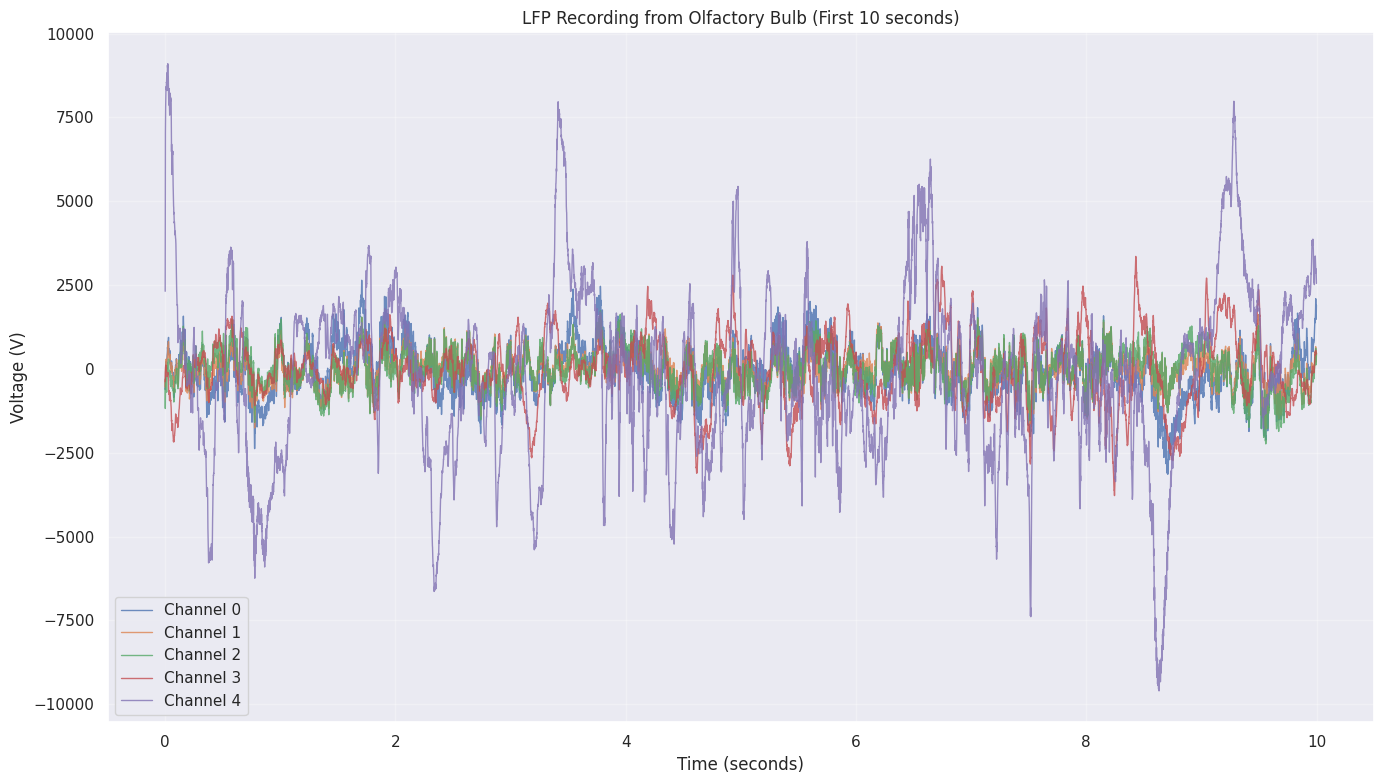

In [8]:
# Get the LFP data from acquisition
lfp = nwb.acquisition['LFP']
print(f"LFP data shape: {lfp.data.shape}")
print(f"Sampling rate: {lfp.rate} Hz")

# We'll extract a small portion of the data to visualize (10 seconds from the beginning)
time_window_secs = 10
samples_to_get = int(time_window_secs * lfp.rate)
start_point = 0

# Time values for plotting
time_values = np.arange(samples_to_get) / lfp.rate

# Get a subset of the LFP data
# Note: Loading only a small time window to avoid large data transfer
lfp_data = lfp.data[start_point:start_point+samples_to_get, :]

# Plot the LFP signals for a few channels
plt.figure(figsize=(14, 8))
channels_to_plot = min(5, lfp_data.shape[1])  # Plot up to 5 channels
for i in range(channels_to_plot):
    plt.plot(time_values, lfp_data[:, i], 
             label=f'Channel {i}', 
             alpha=0.8,
             linewidth=1)

plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('LFP Recording from Olfactory Bulb (First 10 seconds)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Visualizing Sniff Signal Data

The dataset includes raw sniff thermistor signals. Let's visualize this data.

Sniff signal data shape: (1969184,)
Sampling rate: 1000.0 Hz


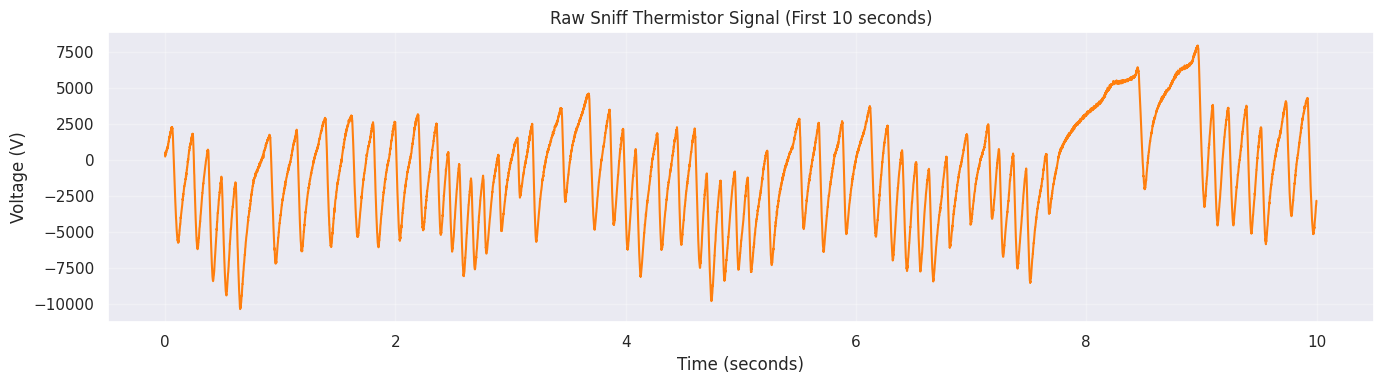

In [9]:
# Get the sniff signal data
sniff_signal = nwb.acquisition['SniffSignal']
print(f"Sniff signal data shape: {sniff_signal.data.shape}")
print(f"Sampling rate: {sniff_signal.rate} Hz")

# Extract the same time window as for the LFP data
sniff_data = sniff_signal.data[start_point:start_point+samples_to_get]

# Plot the sniff signal
plt.figure(figsize=(14, 4))
plt.plot(time_values, sniff_data, color='#ff7f0e')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('Raw Sniff Thermistor Signal (First 10 seconds)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Breathing Analysis - Inhalation and Exhalation

Let's analyze the breathing patterns using the processed inhalation and exhalation data.

Inhalation data:
- Number of events: 10030
- Timestamp data type: float64

Exhalation data:
- Number of events: 10030
- Timestamp data type: float64

Average breathing rate: 0.33 breaths per minute
Average breath duration: 181.878 seconds


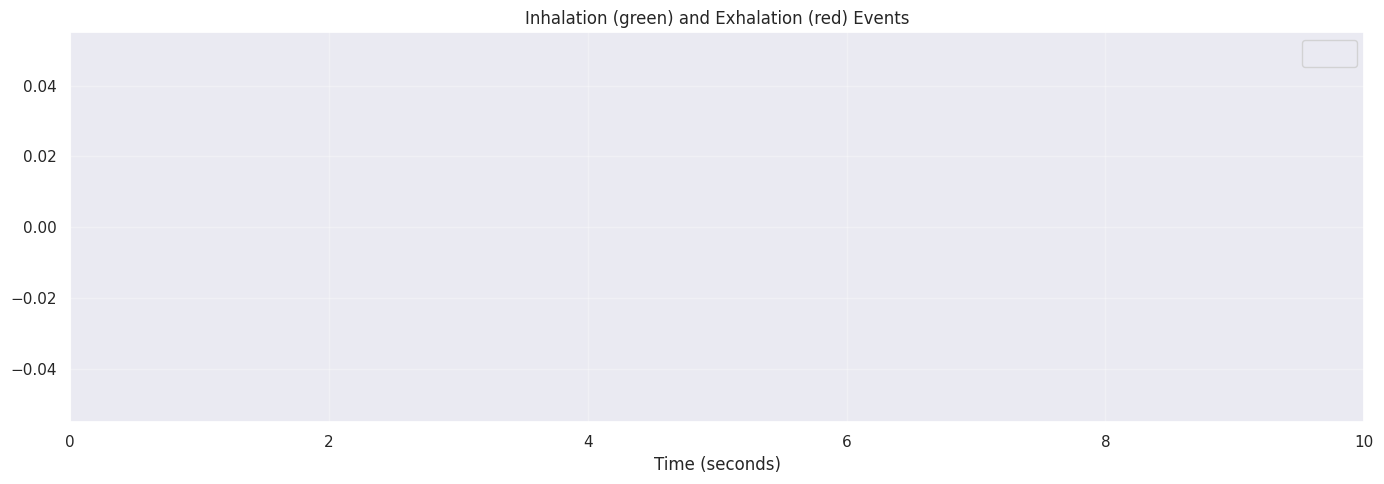

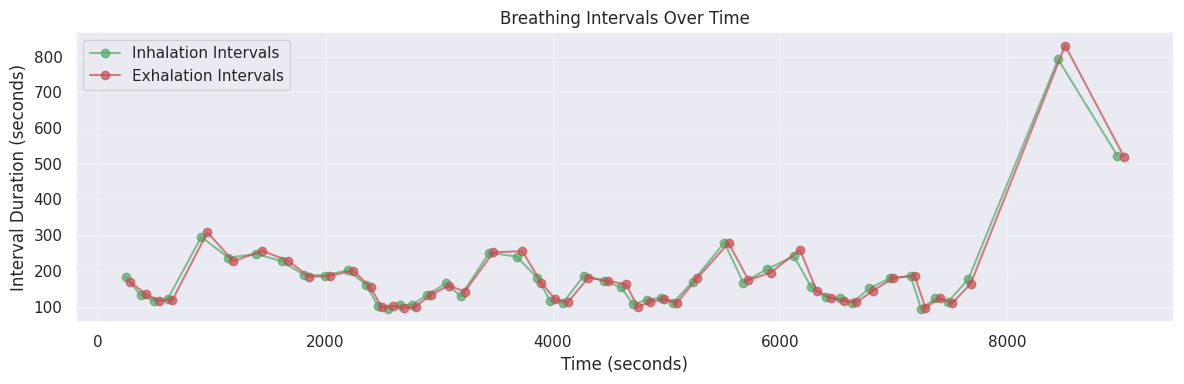

In [10]:
# Get the inhalation and exhalation time data
behavior = nwb.processing['behavior']
inhalation = behavior.data_interfaces['inhalation_time']
exhalation = behavior.data_interfaces['exhalation_time']

print("Inhalation data:")
print(f"- Number of events: {inhalation.data.shape[0]}")
print(f"- Timestamp data type: {inhalation.timestamps.dtype}")

print("\nExhalation data:")
print(f"- Number of events: {exhalation.data.shape[0]}")
print(f"- Timestamp data type: {exhalation.timestamps.dtype}")

# Get the first 50 events for analysis
num_events = 50
inhale_timestamps = inhalation.timestamps[:num_events]
exhale_timestamps = exhalation.timestamps[:num_events]

# Calculate breathing rate (breaths per minute)
# Each complete breath cycle is one inhalation + one exhalation
if len(inhale_timestamps) > 2:  # Need at least a couple of inhalations to calculate
    breath_durations = np.diff(inhale_timestamps)
    mean_breath_duration = np.mean(breath_durations)
    breathing_rate = 60 / mean_breath_duration  # breaths per minute
    
    print(f"\nAverage breathing rate: {breathing_rate:.2f} breaths per minute")
    print(f"Average breath duration: {mean_breath_duration:.3f} seconds")

# Plot inhalation and exhalation events
plt.figure(figsize=(14, 5))

# Create empty plot with the same time range as previous plots for context
plt.plot(time_values, np.zeros(len(time_values)), alpha=0)  

# Plot vertical lines for inhalation and exhalation events within our time window
for t in inhale_timestamps:
    if t <= time_window_secs:
        plt.axvline(x=t, color='green', linestyle='-', alpha=0.7, linewidth=1.5)
        
for t in exhale_timestamps:
    if t <= time_window_secs:
        plt.axvline(x=t, color='red', linestyle='--', alpha=0.7, linewidth=1.5)

plt.xlabel('Time (seconds)')
plt.title('Inhalation (green) and Exhalation (red) Events')
plt.legend(['', 'Inhalation', 'Exhalation'])
plt.xlim(0, time_window_secs)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and plot breath intervals
if len(inhale_timestamps) > 1:
    plt.figure(figsize=(12, 4))
    
    # Time between consecutive inhalations
    inhale_intervals = np.diff(inhale_timestamps)
    plt.plot(inhale_timestamps[1:num_events], inhale_intervals, 'go-', alpha=0.7, label='Inhalation Intervals')
    
    # Time between consecutive exhalations
    if len(exhale_timestamps) > 1:
        exhale_intervals = np.diff(exhale_timestamps)
        plt.plot(exhale_timestamps[1:num_events], exhale_intervals, 'ro-', alpha=0.7, label='Exhalation Intervals')
    
    plt.xlabel('Time (seconds)')
    plt.ylabel('Interval Duration (seconds)')
    plt.title('Breathing Intervals Over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## Relationship Between LFP and Breathing

Let's explore the relationship between the LFP signals and breathing patterns.

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/numpy/_core/_methods.py:139: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


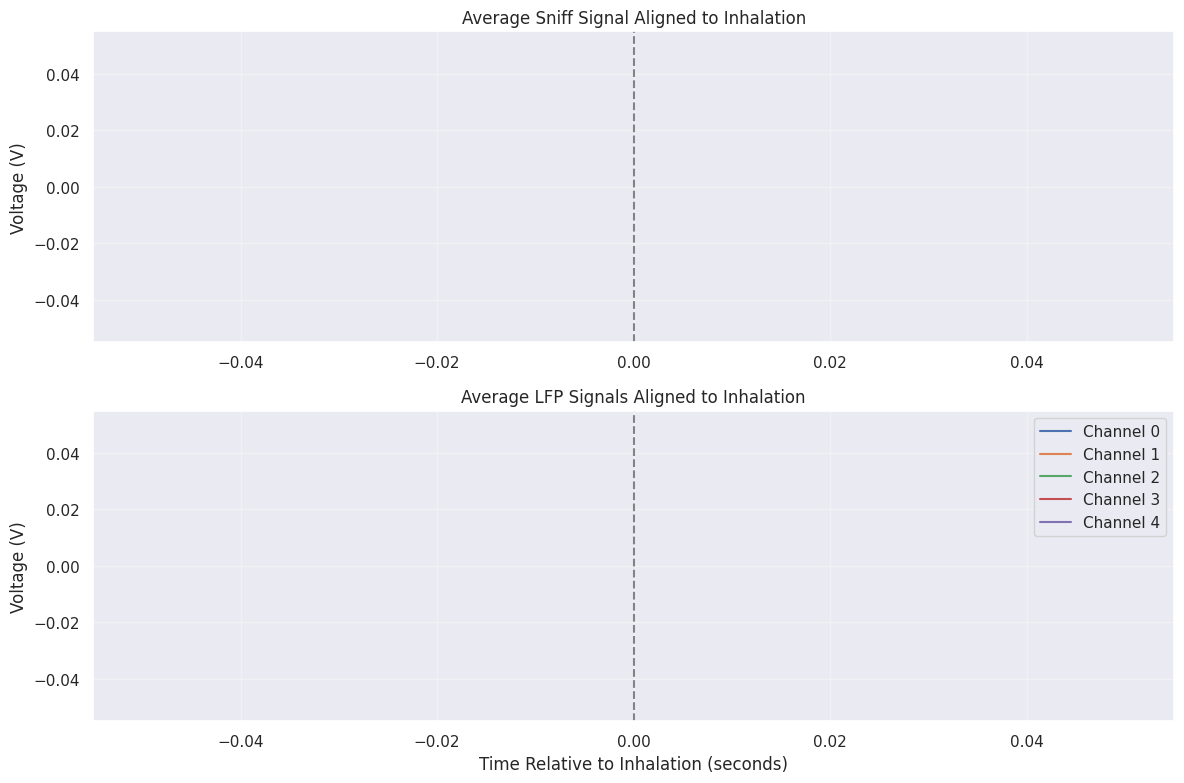

In [11]:
# Let's analyze how LFP activity relates to inhalation events
# We'll compute the average LFP around inhalation times (event-triggered average)

# Define a time window around each inhalation event (-0.5 to +0.5 seconds)
window_before = int(0.5 * lfp.rate)  # samples before inhalation
window_after = int(0.5 * lfp.rate)   # samples after inhalation
window_length = window_before + window_after

# Use inhalation events that are at least 0.5 seconds from the start/end of our data
valid_inhale_events = []
for t in inhale_timestamps:
    sample_idx = int(t * lfp.rate)
    if sample_idx >= window_before and sample_idx + window_after < lfp_data.shape[0]:
        valid_inhale_events.append(sample_idx)

# Collect LFP snippets around each valid inhalation event
lfp_snippets = np.zeros((len(valid_inhale_events), window_length, channels_to_plot))
sniff_snippets = np.zeros((len(valid_inhale_events), window_length))

for i, event_idx in enumerate(valid_inhale_events):
    lfp_snippets[i, :, :] = lfp_data[event_idx - window_before:event_idx + window_after, :channels_to_plot]
    sniff_snippets[i, :] = sniff_data[event_idx - window_before:event_idx + window_after]

# Calculate the average LFP and sniff signal around inhalation events
avg_lfp = np.mean(lfp_snippets, axis=0)
avg_sniff = np.mean(sniff_snippets, axis=0)

# Time axis for plotting (in seconds relative to inhalation)
time_axis = np.linspace(-0.5, 0.5, window_length)

# Plot the results
plt.figure(figsize=(12, 8))

# Plot average sniff signal
plt.subplot(2, 1, 1)
plt.plot(time_axis, avg_sniff, color='#ff7f0e', linewidth=2)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.ylabel('Voltage (V)')
plt.title('Average Sniff Signal Aligned to Inhalation')
plt.grid(True, alpha=0.3)

# Plot average LFP signals
plt.subplot(2, 1, 2)
for i in range(channels_to_plot):
    plt.plot(time_axis, avg_lfp[:, i], label=f'Channel {i}', linewidth=1.5)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Time Relative to Inhalation (seconds)')
plt.ylabel('Voltage (V)')
plt.title('Average LFP Signals Aligned to Inhalation')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Power Spectrum Analysis of LFP Signals

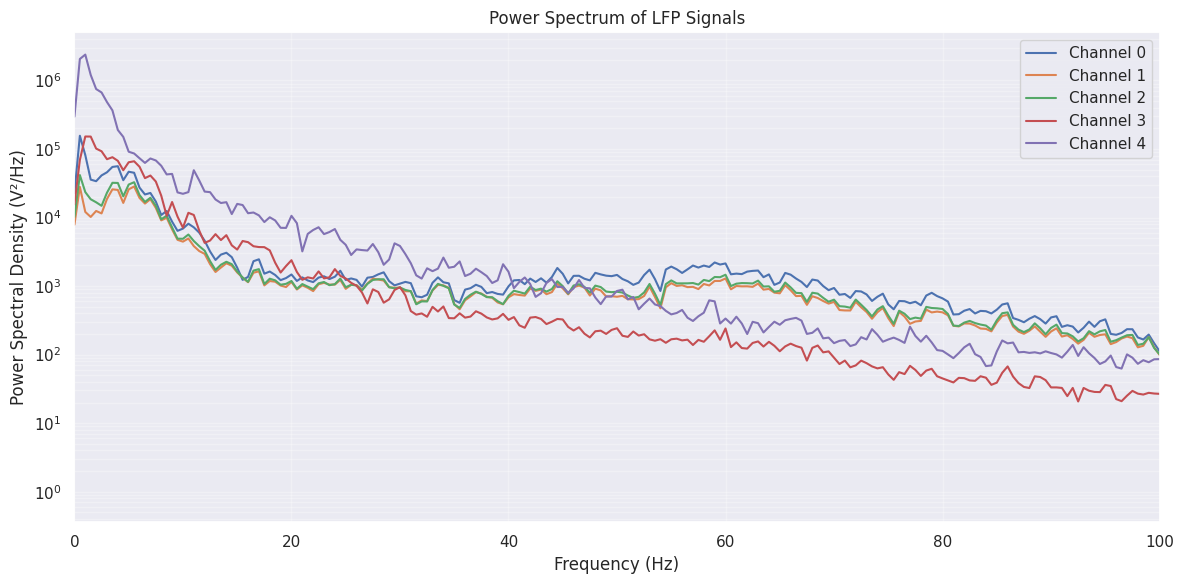

In [12]:
# Compute power spectrum of LFP data
from scipy import signal

# We'll analyze a 30-second segment for better frequency resolution
analysis_duration = 30  # seconds
if lfp_data.shape[0] < analysis_duration * lfp.rate:
    # If we don't have enough data loaded, let's load more
    samples_to_get = int(analysis_duration * lfp.rate)
    if samples_to_get <= lfp.data.shape[0]:  # Make sure we don't exceed file size
        lfp_data = lfp.data[0:samples_to_get, :channels_to_plot]
    else:
        # Just use what we have
        print(f"Using {lfp_data.shape[0]/lfp.rate:.1f} seconds of data instead of {analysis_duration} seconds")

# Compute power spectrum using Welch's method for each channel
freq, psd = signal.welch(lfp_data, fs=lfp.rate, nperseg=int(2 * lfp.rate), 
                        scaling='density', axis=0)

# Plot the power spectrum
plt.figure(figsize=(12, 6))
for i in range(psd.shape[1]):
    plt.semilogy(freq, psd[:, i], label=f'Channel {i}')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (V²/Hz)')
plt.title('Power Spectrum of LFP Signals')
plt.xlim(0, 100)  # Focus on 0-100 Hz where most relevant neural activity occurs
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.tight_layout()
plt.show()

## LFP Channel Correlation Analysis

Let's examine the correlation between different LFP channels to understand the spatial relationships.

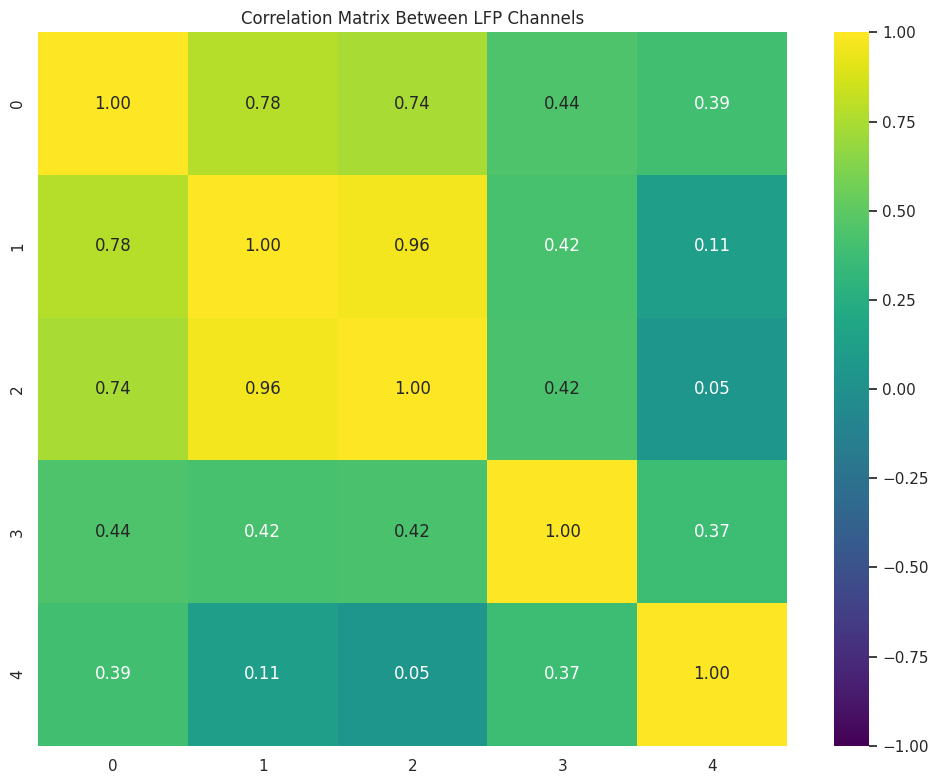

In [13]:
# Calculate correlation matrix between LFP channels
corr_matrix = np.corrcoef(lfp_data.T)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1, fmt='.2f',
           xticklabels=range(channels_to_plot), yticklabels=range(channels_to_plot))
plt.title('Correlation Matrix Between LFP Channels')
plt.tight_layout()
plt.show()

## Summary and Further Exploration

In this notebook, we've explored Dandiset 001433, which contains behavioral and electrophysiological data from mice. We've:

1. Connected to the DANDI archive and examined the dataset metadata
2. Explored the structure of an NWB file containing LFP and breathing data
3. Visualized raw LFP signals from olfactory bulb electrodes
4. Analyzed breathing patterns using inhalation and exhalation events
5. Investigated the relationship between breathing and LFP activity
6. Examined the spectral content of the LFP signals
7. Analyzed correlations between different LFP channels

### Possible next steps for further analysis:

- Analyze data across multiple recording sessions or subjects to identify common patterns
- Apply more advanced signal processing techniques to extract features from the LFP signals
- Correlate electrophysiological activity with specific behavioral events
- Explore phase relationships between breathing cycles and neural oscillations
- Perform time-frequency analysis to characterize dynamic changes in oscillatory activity
- Apply machine learning techniques to classify different states based on neural activity

This dataset provides rich opportunities to explore the relationship between breathing rhythms and neural activity in the olfactory system, which could provide insights into how sensory information is processed and integrated.